In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from src import data_items
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

In [2]:
value = pd.read_csv('data/Zip_MedianValuePerSqft_AllHomes.csv', encoding = "ISO-8859-1")

In [3]:
ausvalue = value[value['City'] == 'Austin']

In [4]:
ausvalue.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
63,92617,78704,Austin,TX,Austin-Round Rock,Travis County,64,139.0,138.0,139.0,139.0,140.0,140.0,142.0,143.0,146.0,148.0,151.0,154.0,156.0,159.0,160.0,162.0,163.0,163.0,164.0,166.0,167.0,167.0,169.0,170.0,171.0,172.0,172.0,173.0,173.0,172.0,171.0,170.0,167.0,166.0,164.0,163.0,162.0,161.0,162.0,162.0,164.0,165.0,167.0,170.0,173.0,175.0,178.0,181.0,183.0,186.0,188.0,190.0,192.0,194.0,196.0,198.0,198.0,199.0,199.0,200.0,200.0,200.0,200.0,200.0,199.0,199.0,199.0,199.0,199.0,198.0,198.0,198.0,197.0,196.0,195.0,194.0,193.0,192.0,191.0,190.0,189.0,189.0,188.0,187.0,186.0,185.0,183.0,182.0,182.0,181.0,181.0,181.0,181.0,182.0,183.0,185.0,187.0,190.0,192.0,195.0,196.0,197.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,208.0,209.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,217.0,217.0,217.0,217.0,217.0,217.0,218.0,219.0,220.0,221.0,222.0,224.0,225.0,227.0,229.0,231.0,233.0,235.0,236.0,237.0,238.0,238.0,238.0,238.0,238.0,237.0,236.0,235.0,234.0,233.0,232.0,231.0,230.0,230.0,229.0,228.0,228.0,227.0,226.0,226.0,225.0,224.0,224.0,224.0,224.0,223.0,223.0,224.0,223.0,223.0,222.0,222.0,221.0,222.0,222.0,222.0,222.0,222.0,223.0,222.0,222.0,223.0,224.0,223.0,223.0,223.0,221.0,221.0,222.0,222.0,223.0,224.0,225.0,225.0,225.0,226.0,227.0,229.0,230.0,231.0,233.0,235.0,236.0,237.0,239.0,240.0,241.0,243.0,245.0,247.0,249.0,251.0,252.0,254.0,256.0,257.0,259.0,262.0,264.0,266.0,268.0,271.0,274.0,275.0,276.0,277.0,279.0,281.0,282.0,285.0,288.0,291.0,293,295,297,298,299,300,302,303,305,307,311,315,318,320,322,324,326,327,328,330,332,335,336,338,339,340,342,344,345,346,348,351,355,357,360,363,364,364,364,366,369,373,375,376
86,92654,78745,Austin,TX,Austin-Round Rock,Travis County,87,100.0,100.0,99.0,99.0,98.0,98.0,98.0,99.0,99.0,99.0,99.0,99.

In [5]:
ausvalue['RegionName'].unique().shape

(42,)

In [6]:
zpcols = data_items.zc_population_cols
zppop = data_items.zc_population_data
zpcoord = data_items.zip_latlong

In [7]:
auspop = pd.DataFrame(zppop, columns=zpcols)

In [8]:
auspop.head()

,Zip Code,Type,County,Population,Area Code
0,78681,Standard,Williamson,50606,512.000000
1,78701,Standard,Travis,6841,0.694708
2,78702,Standard,Travis,21334,0.694708
3,78703,Standard,Travis,19690,512.000000
4,78704,Standard,Travis,42117,0.694708


In [9]:
def get_dist(point):

# approximate radius of earth in km
    R = 6373.0

#unpack and convert the latitudes and longitudes into radians
    lat1, long1 = (radians(elem) for elem in point)
    dtlat, dtlong = radians(30.2648), radians(97.7472)

    difflon = dtlong - long1
    difflat = dtlat - lat1

    a = sin(difflat / 2)**2 + cos(lat1) * cos(dtlat) * sin(difflon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [10]:
len(zpcoord)

78

In [11]:
zipset = set(ausvalue['RegionName'].unique())

In [12]:
for i in list(zpcoord):
    if i not in zipset:
        del zpcoord[i]

In [13]:
len(zpcoord)

39

In [14]:
ausdists = [(k, get_dist(v) - 13066) for k, v in zpcoord.items()]
    
            

In [15]:
auszpdist = pd.DataFrame(ausdists, columns=['Zips', 'Distances'])

In [16]:
distval = auszpdist.merge(ausvalue, how='inner', left_on='Zips', right_on='RegionName')

In [17]:
distvalpop = distval.merge(auspop, how='inner', left_on='Zips', right_on='Zip Code')

In [18]:
distvalpop.head()

,Zips,Distances,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,Zip Code,Type,County,Population,Area Code
0,78704,27.854809,92617,78704,Austin,TX,Austin-Round Rock,Travis County,64,139.0,138.0,139.0,139.0,140.0,140.0,142.0,143.0,146.0,148.0,151.0,154.0,156.0,159.0,160.0,162.0,163.0,163.0,164.0,166.0,167.0,167.0,169.0,170.0,171.0,172.0,172.0,173.0,173.0,172.0,171.0,170.0,167.0,166.0,164.0,163.0,162.0,161.0,162.0,162.0,164.0,165.0,167.0,170.0,173.0,175.0,178.0,181.0,183.0,186.0,188.0,190.0,192.0,194.0,196.0,198.0,198.0,199.0,199.0,200.0,200.0,200.0,200.0,200.0,199.0,199.0,199.0,199.0,199.0,198.0,198.0,198.0,197.0,196.0,195.0,194.0,193.0,192.0,191.0,190.0,189.0,189.0,188.0,187.0,186.0,185.0,183.0,182.0,182.0,181.0,181.0,181.0,181.0,182.0,183.0,185.0,187.0,190.0,192.0,195.0,196.0,197.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,208.0,209.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,217.0,217.0,217.0,217.0,217.0,217.0,218.0,219.0,220.0,221.0,222.0,224.0,225.0,227.0,229.0,231.0,233.0,235.0,236.0,237.0,238.0,238.0,238.0,238.0,238.0,237.0,236.0,235.0,234.0,233.0,232.0,231.0,230.0,230.0,229.0,228.0,228.0,227.0,226.0,226.0,225.0,224.0,224.0,224.0,224.0,223.0,223.0,224.0,223.0,223.0,222.0,222.0,221.0,222.0,222.0,222.0,222.0,222.0,223.0,222.0,222.0,223.0,224.0,223.0,223.0,223.0,221.0,221.0,222.0,222.0,223.0,224.0,225.0,225.0,225.0,226.0,227.0,229.0,230.0,231.0,233.0,235.0,236.0,237.0,239.0,240.0,241.0,243.0,245.0,247.0,249.0,251.0,252.0,254.0,256.0,257.0,259.0,262.0,264.0,266.0,268.0,271.0,274.0,275.0,276.0,277.0,279.0,281.0,282.0,285.0,288.0,291.0,293,295,297,298,299,300,302,303,305,307,311,315,318,320,322,324,326,327,328,330,332,335,336,338,339,340,342,344,345,346,348,351,355,357,360,363,364,364,364,366,369,373,375,376,78704,Standard,Travis,42117,0.694708
1,78705,23.

In [19]:
Xdf = distvalpop[['Zips', 'Distances', '2019-02', 'Population']]

In [20]:
X = Xdf.values

In [46]:
Xdf.to_pickle('naive.pkl')

In [21]:
from sklearn.cluster import KMeans

In [22]:
cluster = KMeans(n_clusters=2)

In [23]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
cluster.labels_

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int32)

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


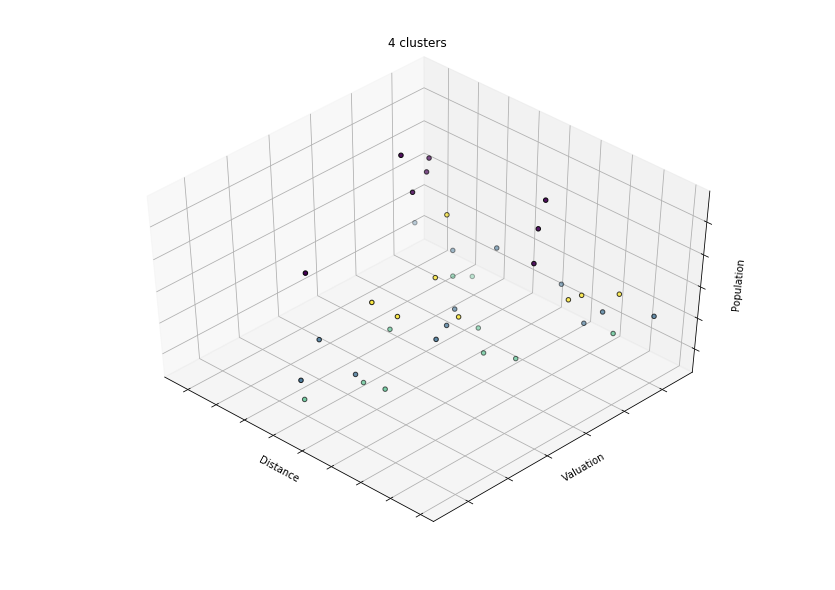

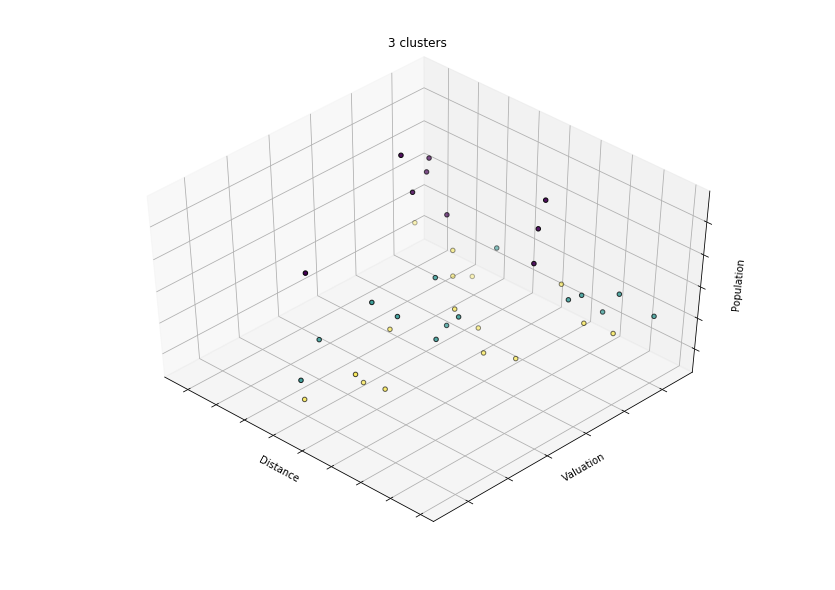

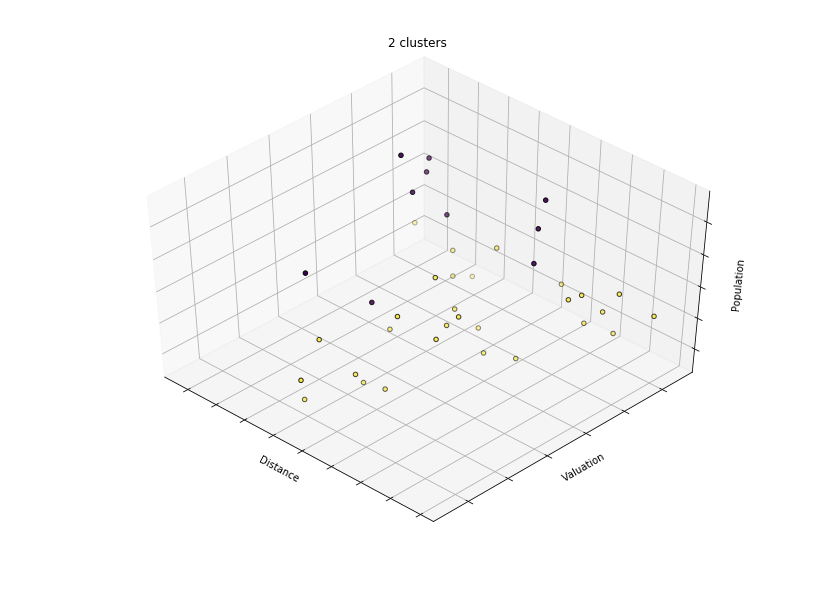

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

np.random.seed(5)

estimators = [('k_means_4', KMeans(n_clusters=4)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_2', KMeans(n_clusters=2))]

fignum = 1
titles = ['4 clusters', '3 clusters', '2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 1], X[:, 2], X[:, 3],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Valuation')
    ax.set_zlabel('Population')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

fig.show()

In [33]:
import numpy as np
import ipyvolume as ipv

In [34]:
x, y, z = X[:, 1], X[:, 2], X[:, 3]

In [35]:
fig = ipv.figure()

In [36]:
fig = ipv.figure()
scatter = ipv.scatter(x, y, z, marker='sphere')
ipv.show()

In [37]:
scatter.geo = 'box'

In [38]:
ipv.show()

In [39]:
ipv.quickscatter(x,y,z, size=1, marker='sphere')

In [41]:
N = 1000
x1, y1, z1 = np.random.normal(0, 1, (3, N))

In [42]:
fig = ipv.figure()
scatter = ipv.scatter(x1, y1, z1, marker='sphere')
ipv.show()

In [43]:
ipv.save('example.html')

error: bad escape \u at position 0